In [7]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

### EXPLORATORY DATA ANALYSIS (EDA) 

In [8]:
#uploading the data
df = pd.read_csv("/Users/markadut/Desktop/DATA1030-Fall2021-master/spotify_song_popularity/data/SpotifyFeatures.csv")
df

genre        artist_name  \
0            Opera     Giuseppe Verdi   
1            Opera    Giacomo Puccini   
2            Opera    Giacomo Puccini   
3            Opera     Giuseppe Verdi   
4            Opera     Giuseppe Verdi   
...            ...                ...   
228154  Soundtrack        Max Richter   
228155  Soundtrack  Michael Giacchino   
228156  Soundtrack       Trevor Jones   
228157  Soundtrack      Randy Edelman   
228158  Soundtrack     Rachel Portman   

                                               track_name  \
0       Stiffelio, Act III: Ei fugge! … Lina, pensai c...   
1       Madama Butterfly / Act 1: ... E soffitto e pareti   
2           Turandot / Act 2: Gloria, gloria, o vincitore   
3            Rigoletto, Act IV: Venti scudi hai tu detto?   
4                Don Carlo / Act 4: "Ella giammai m'amò!"   
...                                                   ...   
228154                                            Infra 3   
228155                       Rebellions Are Built on Hope   
228156                               Last Of The Mohicans   
228157                         Battle Of Little Round Top   
228158      Homer Returns to the Orphanage - Instrumental   

                      track_id  popularity  acousticness  danceability  \
0       7EsKYeHtTc4H4xWiTqSVZA          21       0.98600        0.3130   
1       7MfmRBvqaW0I6UTxXnad8p          18       0.97200        0.3600   
2       7pBo1GDhIysyUMFXiDVoON          10       0.93500        0.1680   
3       02mvYZX5aKNzdqEo6jF20m          17       0.96100        0.2500   
4       03TW0jwGMGhUabAjOpB1T9          19       0.98500        0.1420   
...                        ...         ...           ...           ...   
228154  1k6KlfUluhk6yVLRs7JzID          32       0.98800        0.4650   
228155  2y0ujQbyIKpfmGnex4VJZU          36       0.85500        0.0610   
228156  6L1iVDyzSqOPxWxAVJcrw5          30       0.00169        0.0631   
228157  2bggclVxtOAOUEFdHWqiKe          31       0.73400        0.1760   
228158  2lKpKxPlhoilezsUckp4wg          36       0.97700        0.1900   

        duration_ms   energy  instrumentalness key  liveness  loudness   mode  \
0            490867  0.23100          0.000431  C#    0.0964   -14.287  Major   
1            176797  0.20100          0.028000  D#    0.1330   -19.794  Major   
2            266184  0.47000          0.020400   C    0.3630    -8.415  Major   
3            288573  0.00605          0.000000   D    0.1200   -33.440  Major   
4            629760  0.05800          0.146000   D    0.0969   -23.625  Major   
...             ...      ...               ...  ..       ...       ...    ...   
228154       181613  0.09780          0.915000  F#    0.5340   -16.180  Minor   
228155       176067  0.02550          0.899000   A    0.0919   -22.064  Major   
228156       326043  0.50600          0.172000   C    0.0961    -9.898  Minor   
228157       237893  0.21500          0.860000   E    0.0921   -15.586  Minor   
228158       221840  0.05130          0.862000   G    0.3090   -18.782  Major   

        speechiness    tempo time_signature  valence  
0            0.0547   86.001            4/4   0.0886  
1            0.0581  131.798            4/4   0.3690  
2            0.0383   75.126            3/4   0.0696  
3            0.0480   76.493            4/4   0.0380  
4            0.0493  172.935            4/4   0.0382  
...             ...      ...            ...      ...  
228154       0.0296   75.173            4/4   0.1450  
228155       0.0393   57.042            4/4   0.0321  
228156       0.0357   68.014            4/4   0.0434  
228157       0.0361  113.024            5/4   0.0358  
228158       0.0394   82.031            3/4   0.0367  

[228159 rows x 18 columns]

In [9]:
#OF COLS, ROWS
print("# OF ROWS: " + str(df.shape[0]))
print("# OF COLUMNS: " + str(df.shape[1]))

# OF ROWS: 228159
# OF COLUMNS: 18


In [10]:
#STORING COLUMN NAMES IN LIST, READING DATA TYPES OF EACH COLUMN
columns_list = df.columns
df.dtypes
columns_list

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [11]:
#DESCRIPTIVE STATISTICS ON THE DATASET
df.describe()

popularity   acousticness   danceability   duration_ms  \
count  228159.000000  228159.000000  228159.000000  2.281590e+05   
mean       44.209130       0.351200       0.554198  2.366092e+05   
std        17.276599       0.351385       0.183949  1.166787e+05   
min         0.000000       0.000001       0.056900  1.550900e+04   
25%        33.000000       0.030900       0.437000  1.862530e+05   
50%        47.000000       0.205000       0.570000  2.211730e+05   
75%        57.000000       0.689000       0.690000  2.648400e+05   
max       100.000000       0.996000       0.987000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  228159.000000     228159.000000  228159.000000  228159.000000   
mean        0.580967          0.137310       0.214638      -9.354658   
std         0.260577          0.292447       0.196977       5.940994   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.405000          0.000000       0.097700     -11.287000   
50%         0.618000          0.000037       0.128000      -7.515000   
75%         0.793000          0.023400       0.263000      -5.415000   
max         0.999000          0.999000       1.000000       1.585000   

         speechiness          tempo        valence  
count  228159.000000  228159.000000  228159.000000  
mean        0.122442     117.423062       0.444795  
std         0.186264      30.712458       0.255397  
min         0.022200      30.379000       0.000000  
25%         0.036800      92.734000       0.232000  
50%         0.050600     115.347000       0.430000  
75%         0.109000     138.887000       0.643000  
max         0.967000     239.848000       1.000000

In [12]:
#CHECK NULL/NAN COLUMNS 
df.isna().sum() #note: no null values in dataset

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [13]:
#TARGET VARIABLE
song_popularity = df['popularity'] # setting up target variable
song_popularity.value_counts()

53     6712
52     6553
51     6551
50     6473
49     6118
       ... 
96        8
94        7
99        4
98        3
100       2
Name: popularity, Length: 101, dtype: int64

In [14]:
#FEATURE MATRIX
#dropping the song id column to build feature matrix later in preprocessing
df = df.drop(columns=['track_id'], axis=1) #track id is being dropped since it is unique to each row and has predictive capabilities
feature_matrix = df.loc[:, df.columns != 'popularity']
feature_matrix.value_counts()

genre       artist_name     track_name                                           acousticness  danceability  duration_ms  energy  instrumentalness  key  liveness  loudness  mode   speechiness  tempo    time_signature  valence
A Capella   BYU Noteworthy  Star Wars: A Capella Strikes Back                    0.703000      0.313         241350       0.405   0.009140          B    0.0957    -7.401    Major  0.0325       95.254   4/4             0.291      1
R&B         Noname          Shadow Man (feat. Phoelix, Smino & Saba)             0.469000      0.611         311000       0.454   0.000002          C    0.1890    -7.436    Minor  0.2010       93.004   4/4             0.444      1
                            Diddy Bop (feat. Cam O'bi & Raury)                   0.713000      0.637         208000       0.503   0.000113          C#   0.1090    -6.927    Major  0.3360       81.061   4/4             0.661      1
                            Don't Forget About Me                                

In [15]:
#CHECKING FOR DUPLICATE DATA
num_of_duplicate_data = df.duplicated().sum() # no duplicates
num_of_duplicate_data

0

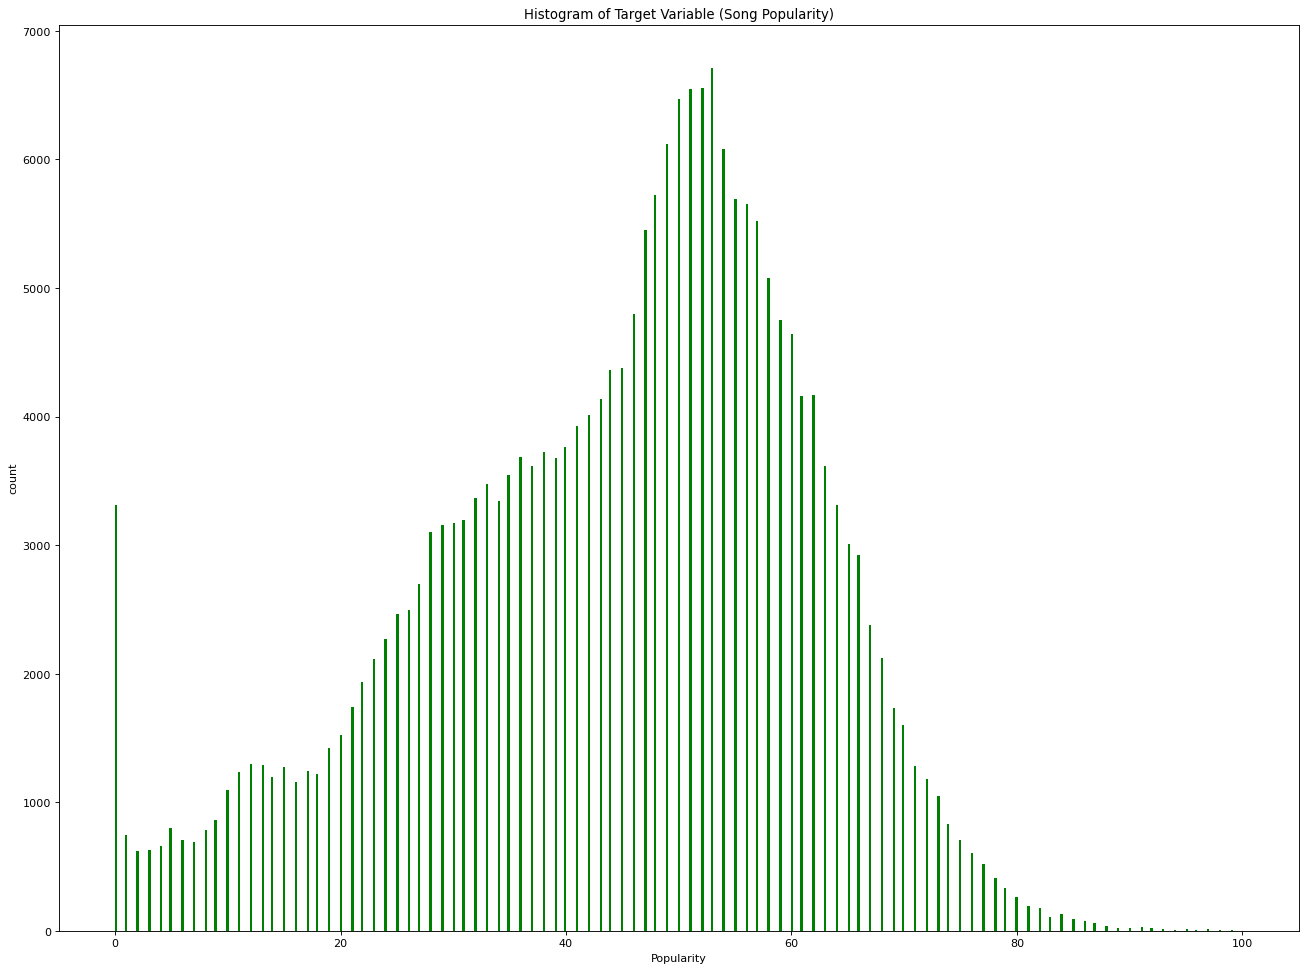

In [16]:
from matplotlib.pyplot import figure 
#VISUALIZATION OF TARGET VARIABLE
figure(figsize=(20, 15), dpi=80)
plt.hist(df["popularity"], color = 'green', bins=int(np.sqrt(df.shape[0])))
plt.xlabel("Popularity")
plt.ylabel("count")
plt.title("Histogram of Target Variable (Song Popularity)")
plt.show()

In [17]:
#BUILDING CORRELATION MATRIX
# import seaborn as sns 

# fig, ax = plt.subplots(figsize=(8,6))

# corr = df.corr()

# ax = sns.heatmap(
#     corr, 
#     annot=True,
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.light_palette('seagreen'),
#     square=True, 
# )

# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );
# # plt.savefig('/Users/markadut/Desktop/data1030-midterm-project/plots/cor_matrix.eps', format='eps')
# plt.title("Correlation Matrix")
# plt.show()

ANALYSIS OF CORRELATION MATRIX: Looking at the correlation matrix, we can distinguish the variables that are positively or negatively correlated. For example, if we look at the (i,j) location where loudness meets energy, we can infer that they are positively correlated (as this is what we would expect). An example to negatively correalated features can be given as energy and acousticness (-0.72). Moreover, looking at our target variable (popularity), there aren't very strong correlations individually between feature vars and target var. However, this does't mean there won't be statistically significant relationships between our target variable and feature matrix.

In [18]:
from matplotlib.pyplot import figure
# pd.plotting.scatter_matrix(df.iloc[:,:], figsize = (20,15), color='green')
# plt.show()

ANALYSIS OF THE SCATTER MATRIX: Looking at the scatter matrix, we can identify the whether which features that are continous or categorical. Since our target variable (popularity) is categorical, it is noticeable that for certain features (categorical ones), scattering is not an effective visualization method. Although there are various categorical features such as genre, sound key, etc. due to the size of the dataset as well as due to the fact that both genre and sound key are strings/objects, they have to first be transformed into numbers for effective analysis/predictions/visualizations. 

### PLOTTING FEATURE VARIABLES VS. THE TARGET VARIABLE

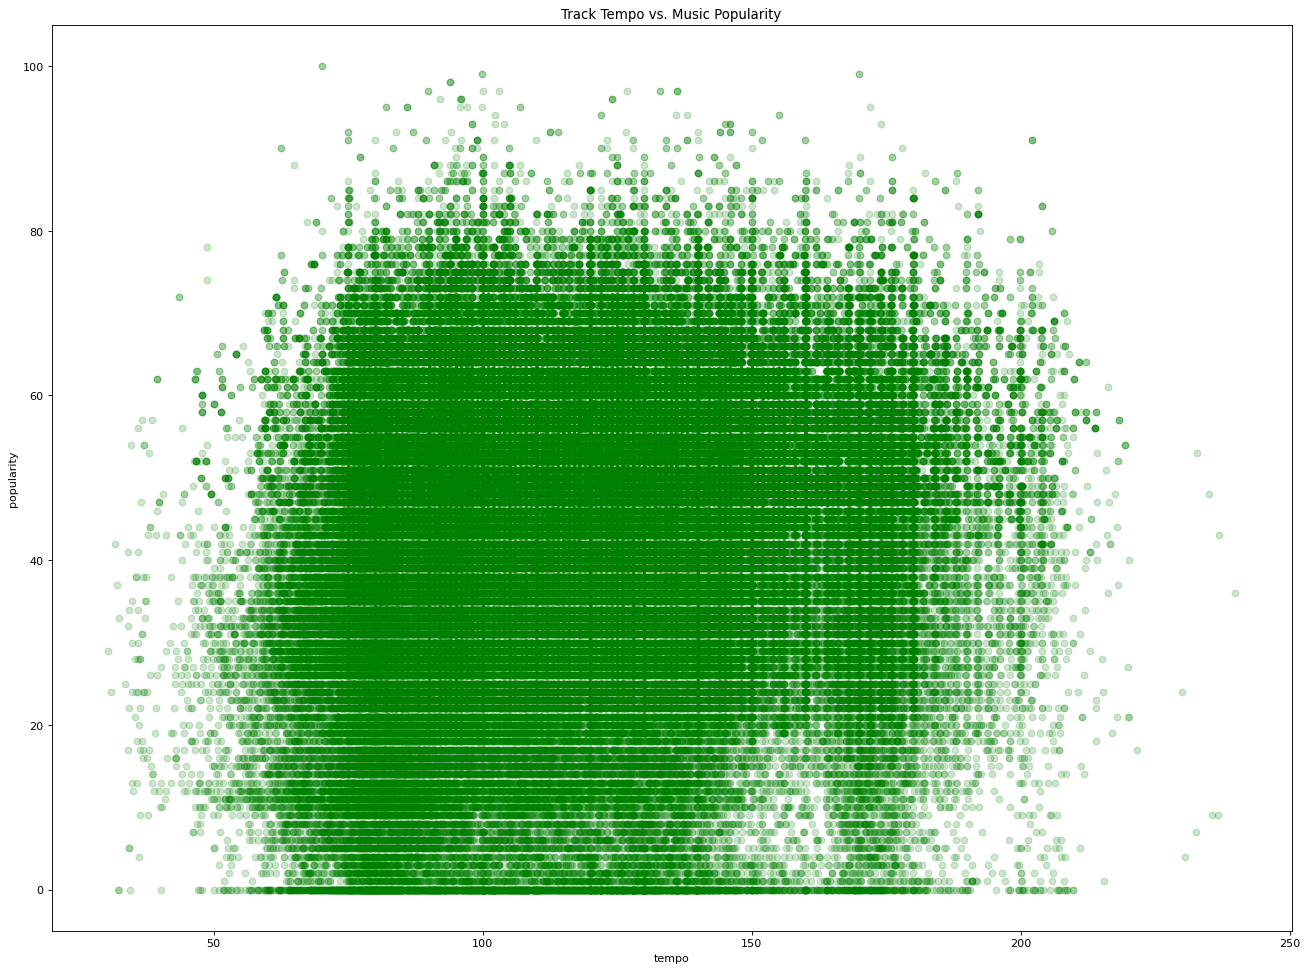

In [19]:
#TEMPO
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['tempo'], df['popularity'], alpha=0.2, color='green')
plt.xlabel("tempo")
plt.ylabel("popularity")
plt.title("Track Tempo vs. Music Popularity")
plt.show()

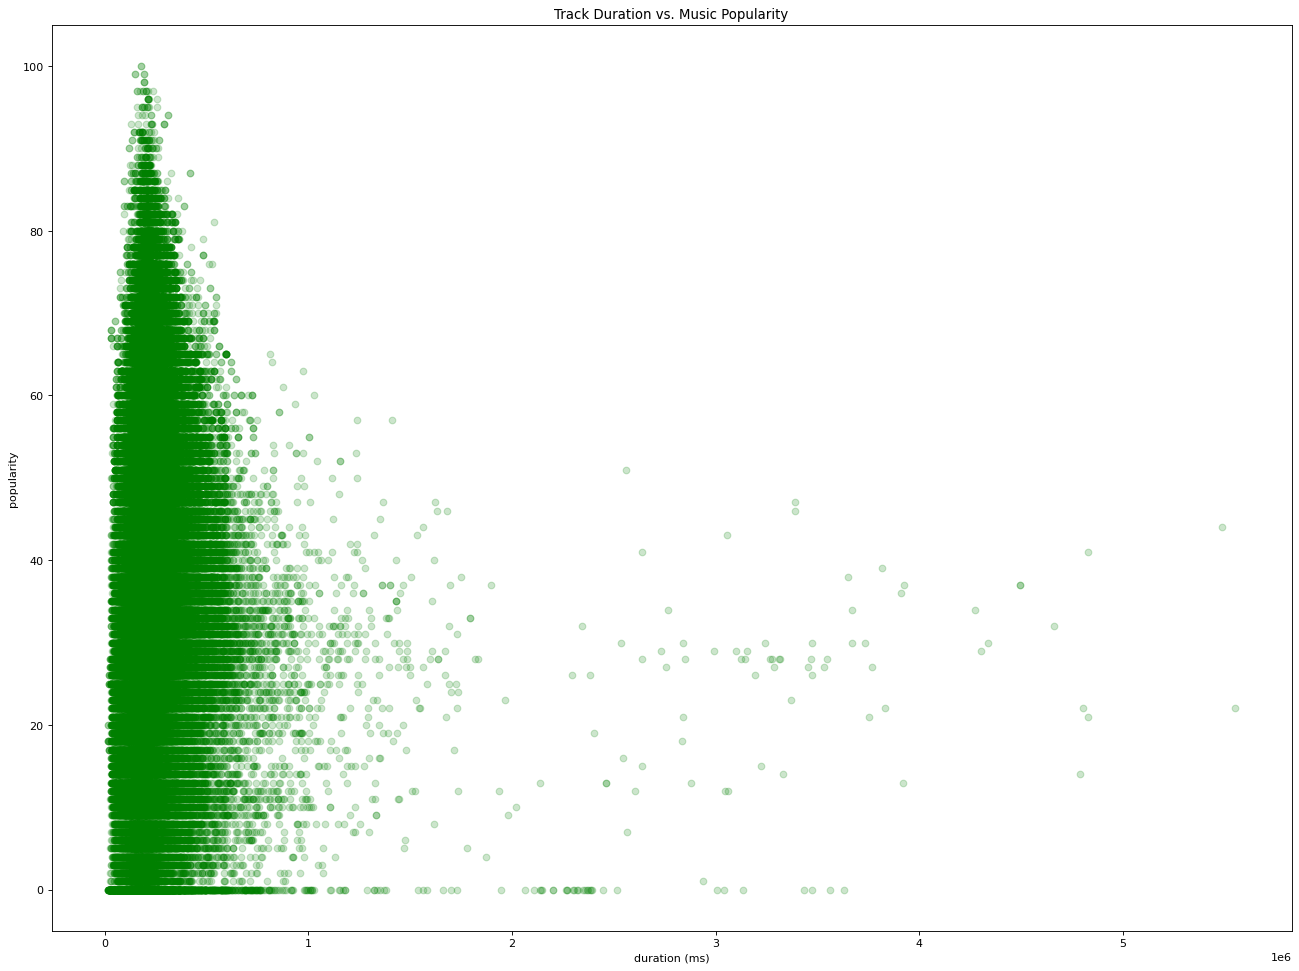

In [20]:
#Duration
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['duration_ms'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("duration (ms)")
plt.ylabel("popularity")
plt.title("Track Duration vs. Music Popularity")
plt.show()

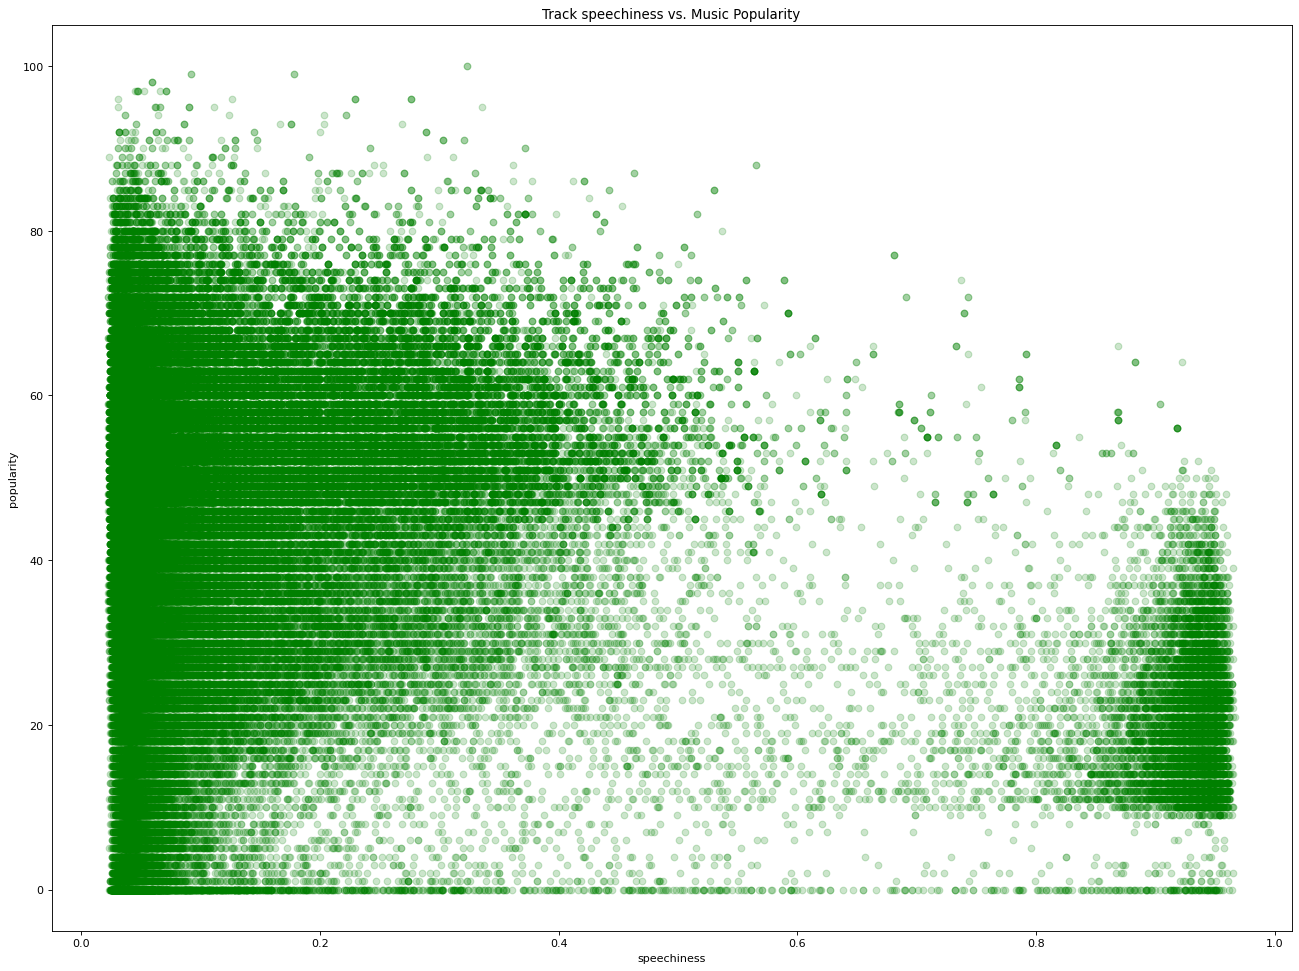

In [21]:
#SPEECHINESS
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['speechiness'], df['popularity'], alpha=0.2,color = 'green')
plt.xlabel("speechiness")
plt.ylabel("popularity")
plt.title("Track speechiness vs. Music Popularity")
plt.show()

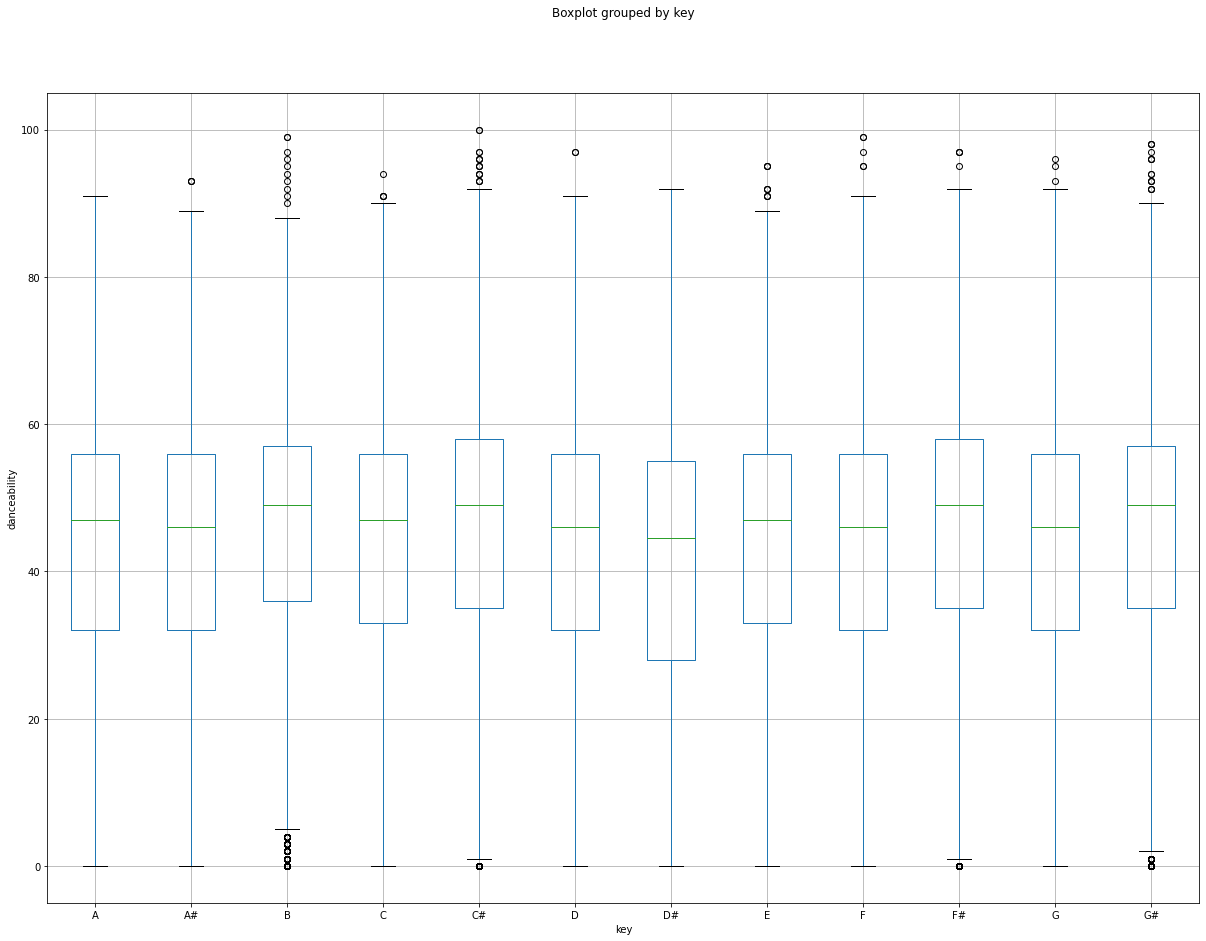

In [22]:
# SONG KEY
from matplotlib.pyplot import figure 
df[["key", "popularity"]].boxplot(by="key", figsize=(20,15))
plt.xlabel("key")
plt.ylabel("danceability")
plt.title("")
plt.show()

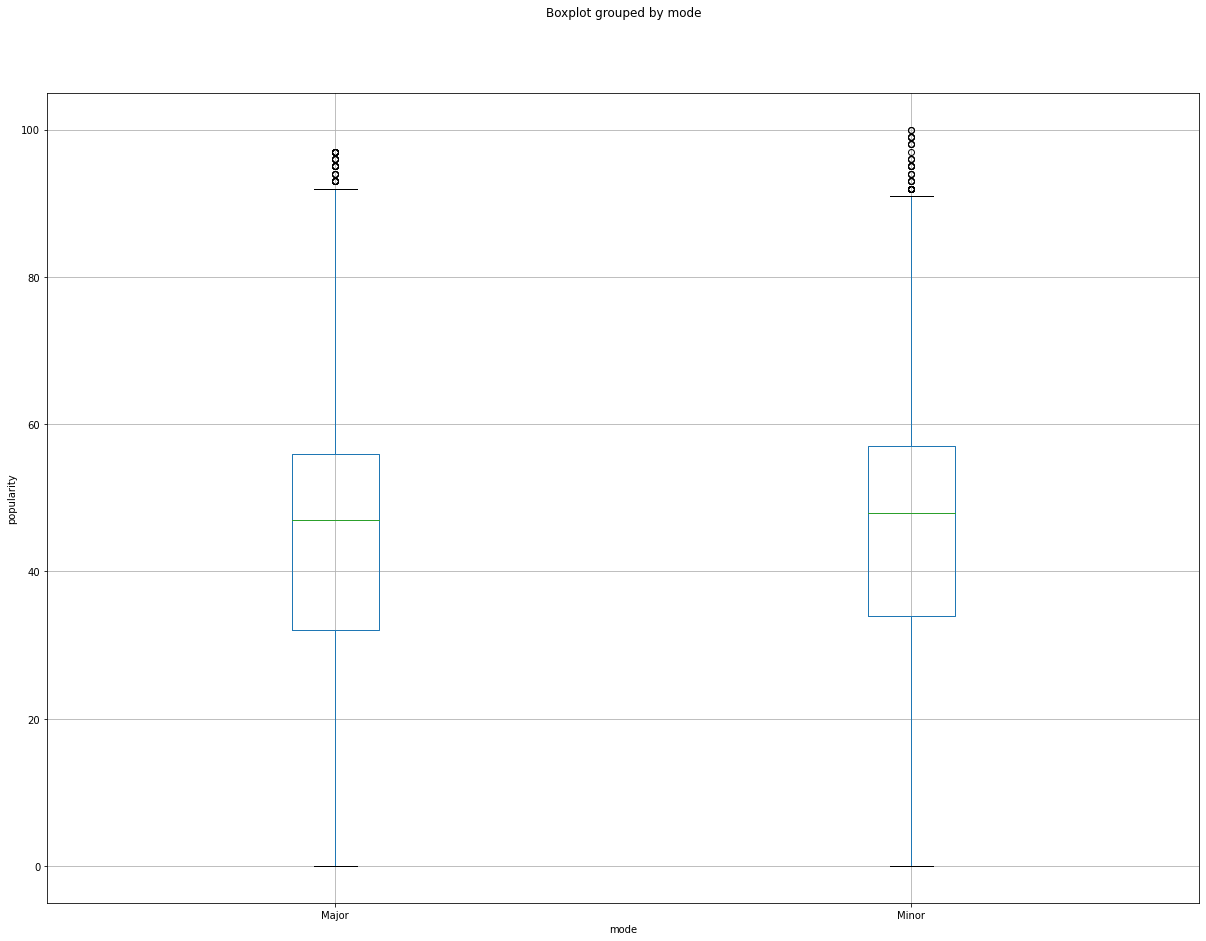

In [23]:
# SONG MODE
from matplotlib.pyplot import figure 
df[["mode", "popularity"]].boxplot(by="mode", figsize=(20,15))
plt.xlabel("mode")
plt.ylabel("popularity")
plt.title("")
plt.show()

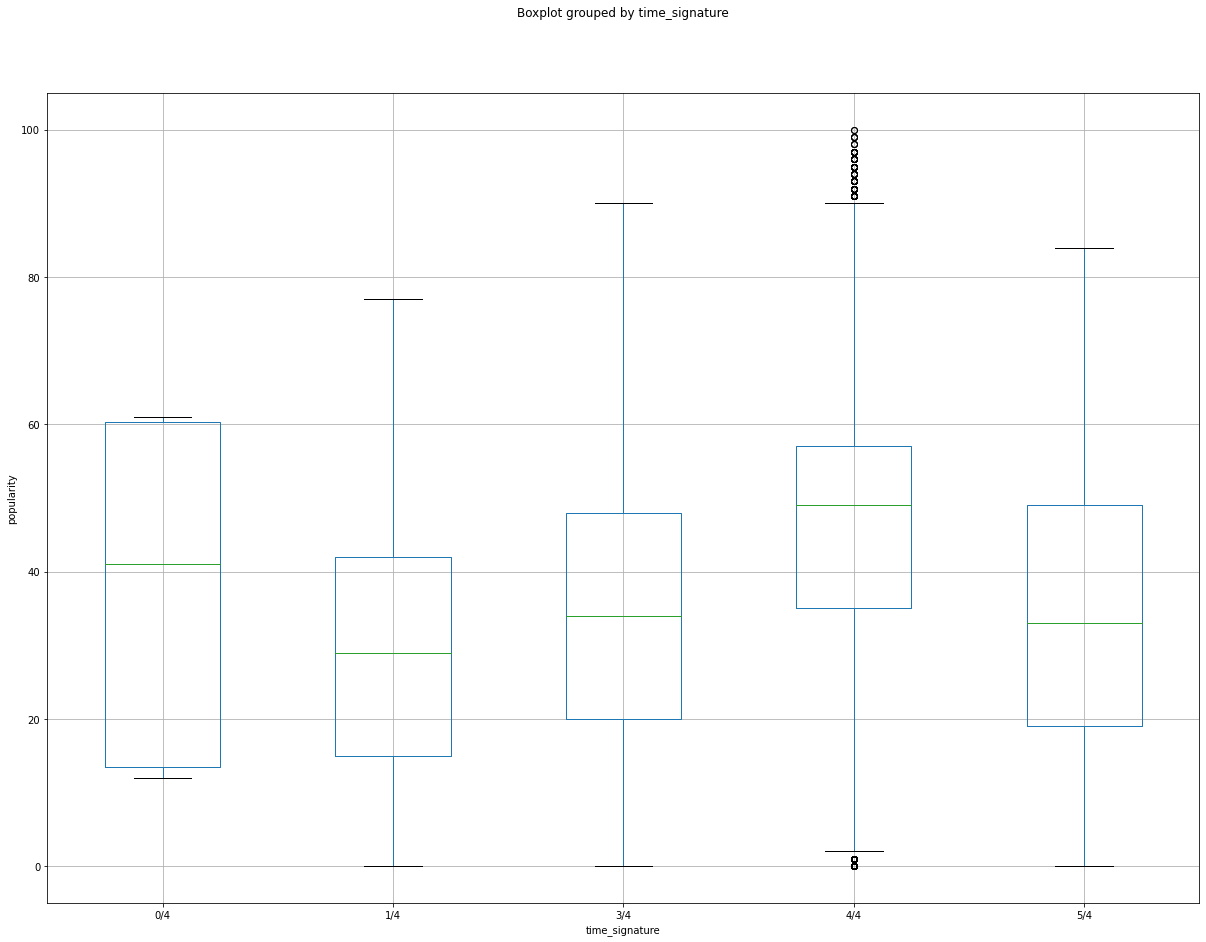

In [24]:
#SONG time_signature
from matplotlib.pyplot import figure 
df[["time_signature", "popularity"]].boxplot(by="time_signature", figsize=(20,15))
plt.xlabel("time_signature")
plt.ylabel("popularity")
plt.title("")
plt.show()

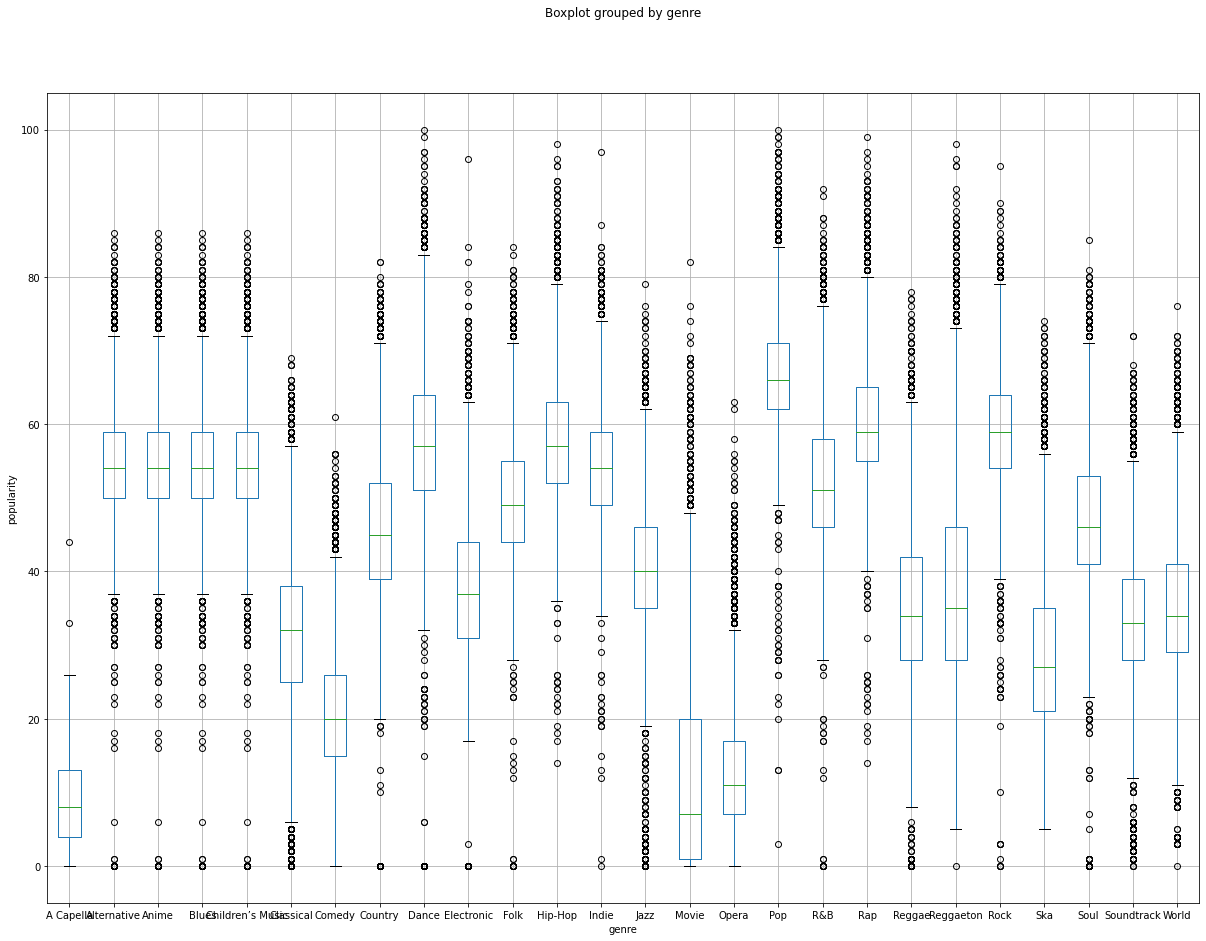

In [25]:
#SONG time_signature
from matplotlib.pyplot import figure 
df[["genre", "popularity"]].boxplot(by="genre", figsize=(20,15))
plt.xlabel("genre")
plt.ylabel("popularity")
plt.title("")
plt.show()

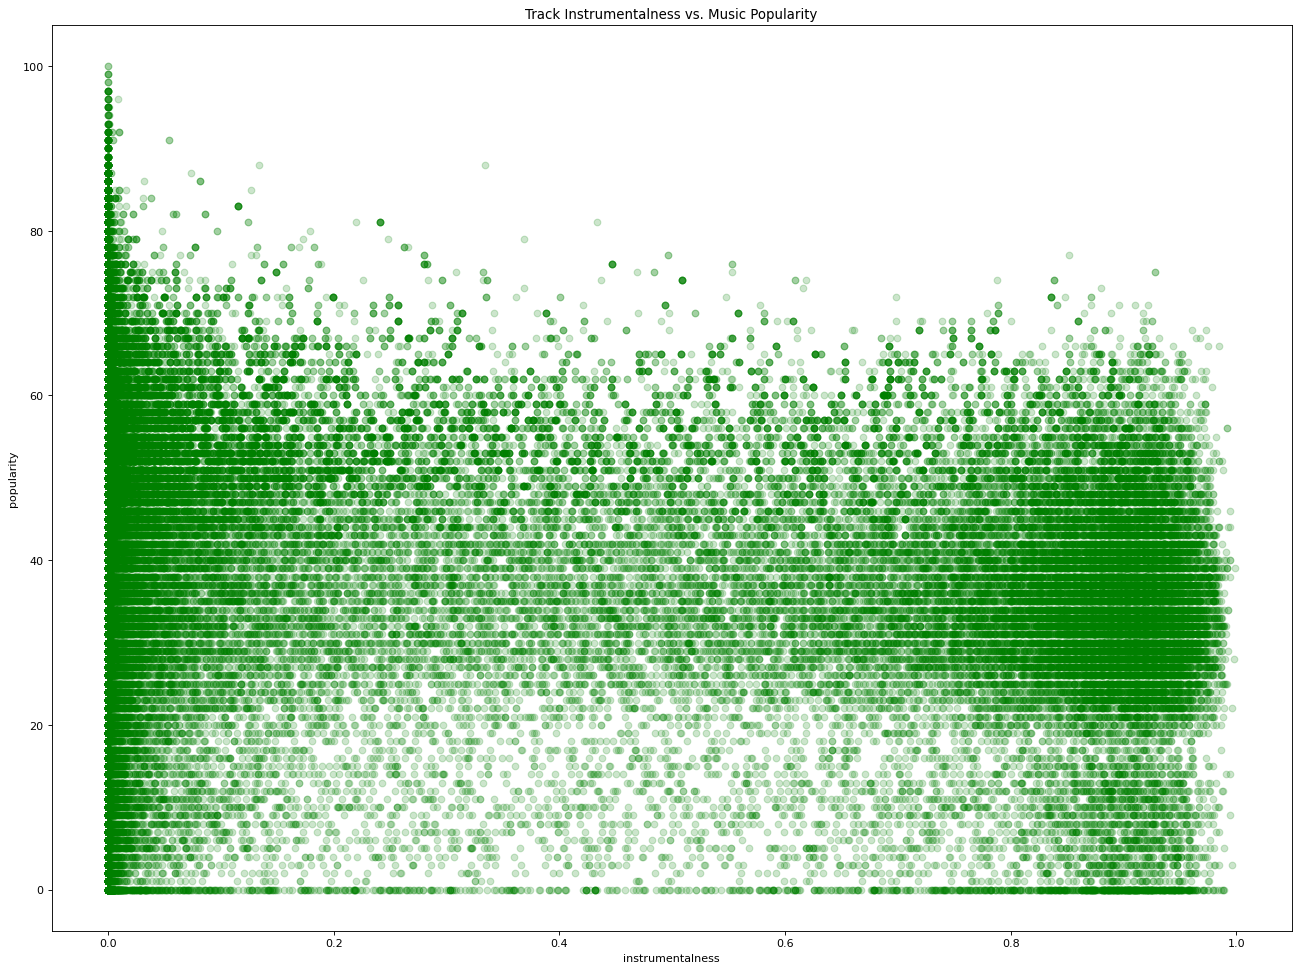

In [26]:
#Instrumentallness
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['instrumentalness'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("instrumentalness")
plt.ylabel("popularity")
plt.title("Track Instrumentalness vs. Music Popularity")
plt.show()

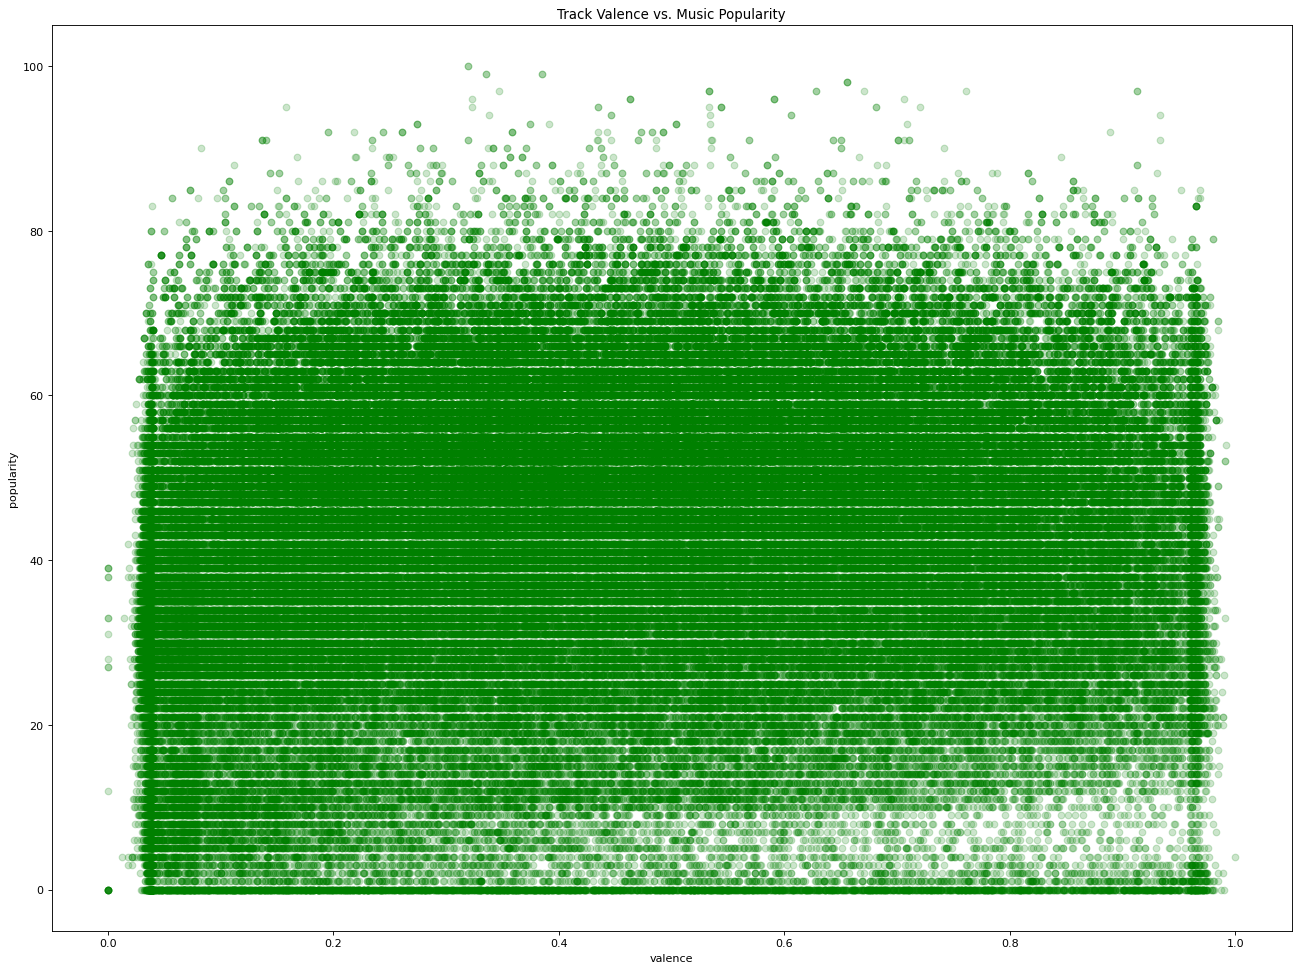

In [27]:
#Valence
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['valence'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("valence")
plt.ylabel("popularity")
plt.title("Track Valence vs. Music Popularity")
plt.show()

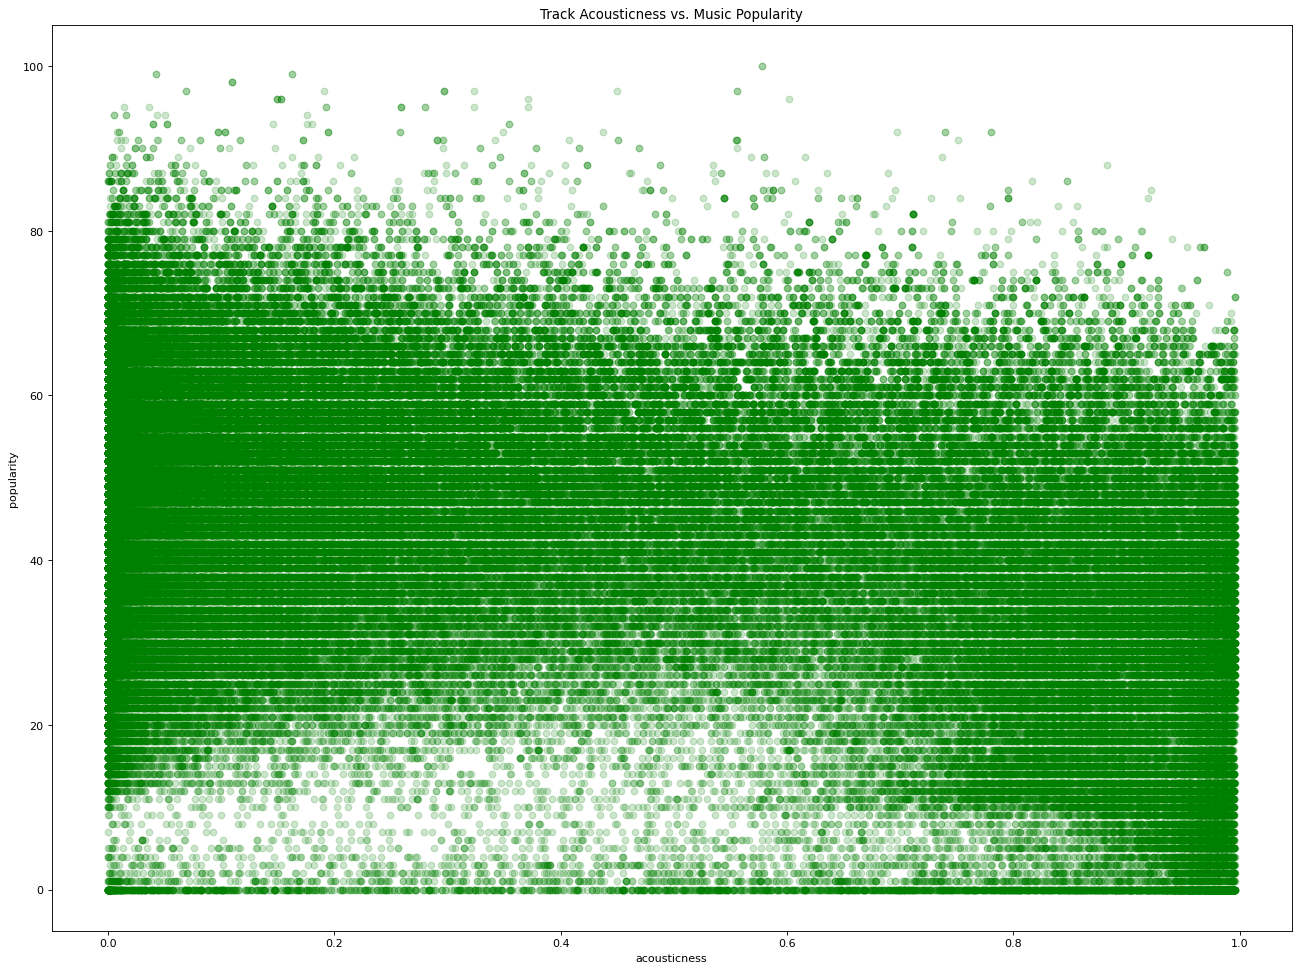

In [28]:
#acousticness
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['acousticness'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("acousticness")
plt.ylabel("popularity")
plt.title("Track Acousticness vs. Music Popularity")
plt.show()

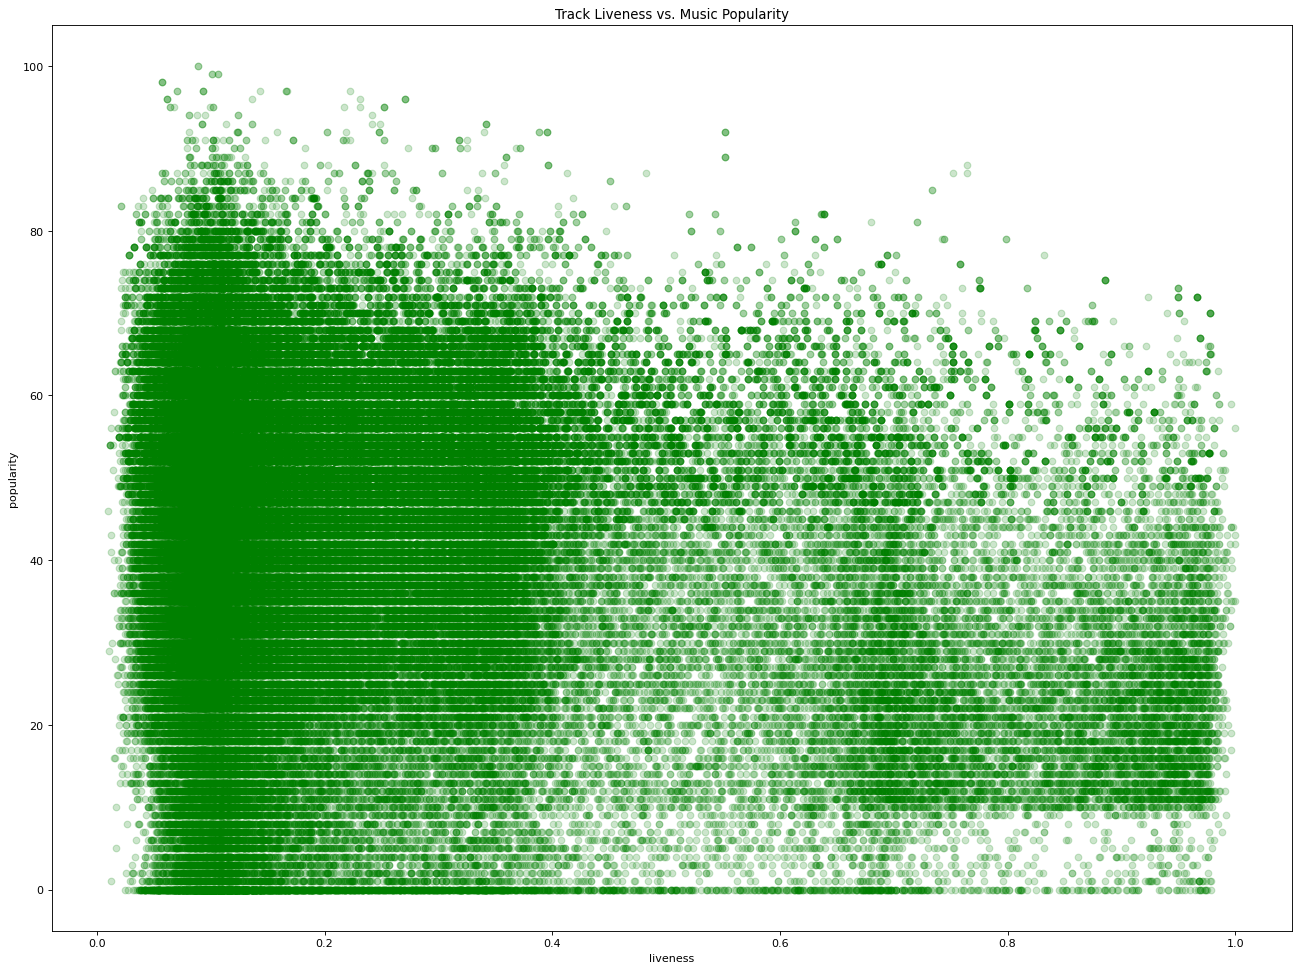

In [29]:
#liveness
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['liveness'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("liveness")
plt.ylabel("popularity")
plt.title("Track Liveness vs. Music Popularity")
plt.show()

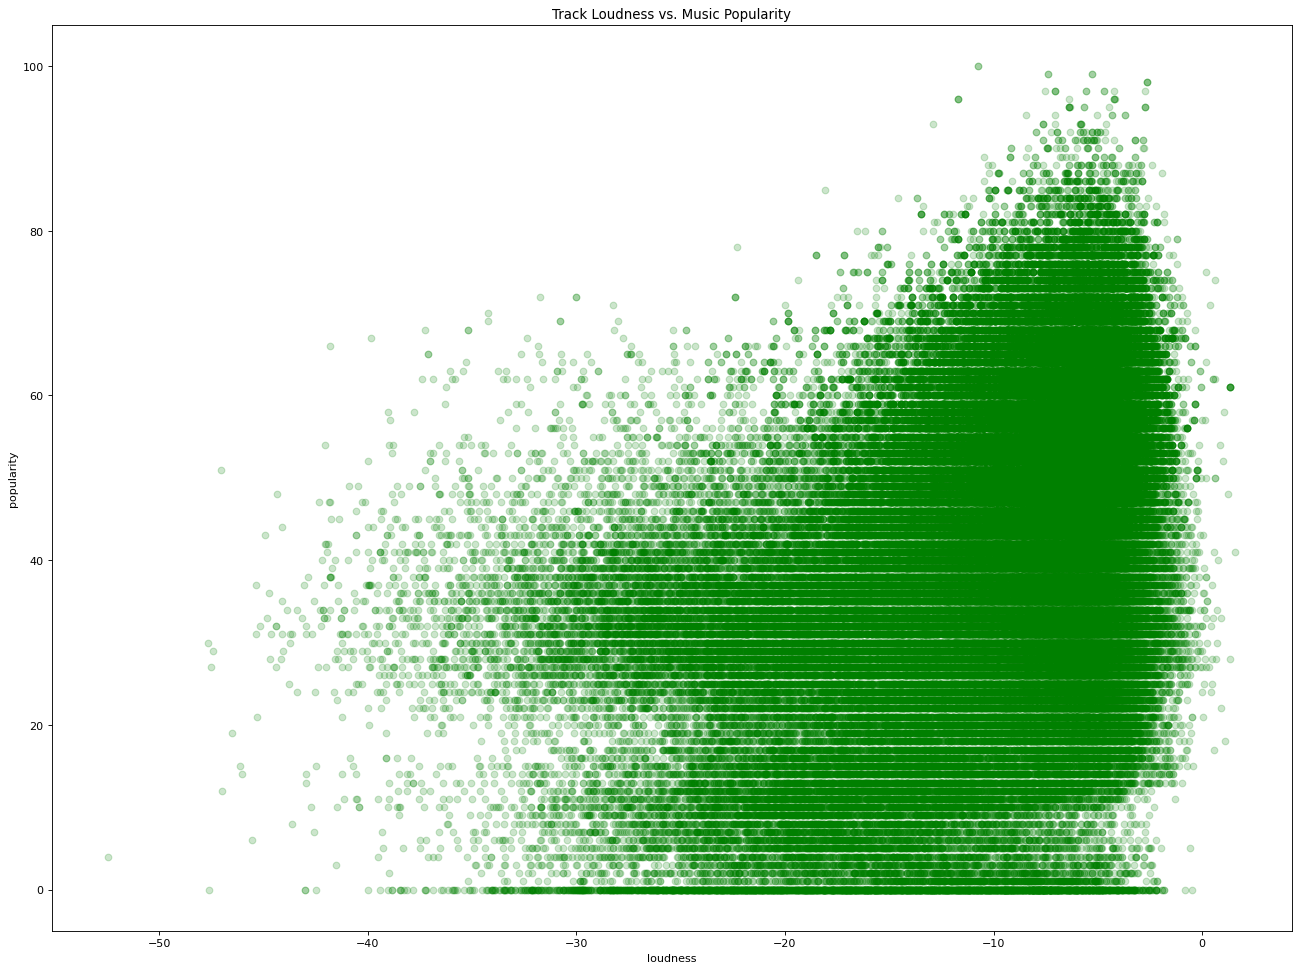

In [30]:
#loudness
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['loudness'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("loudness")
plt.ylabel("popularity")
plt.title("Track Loudness vs. Music Popularity")
plt.show()

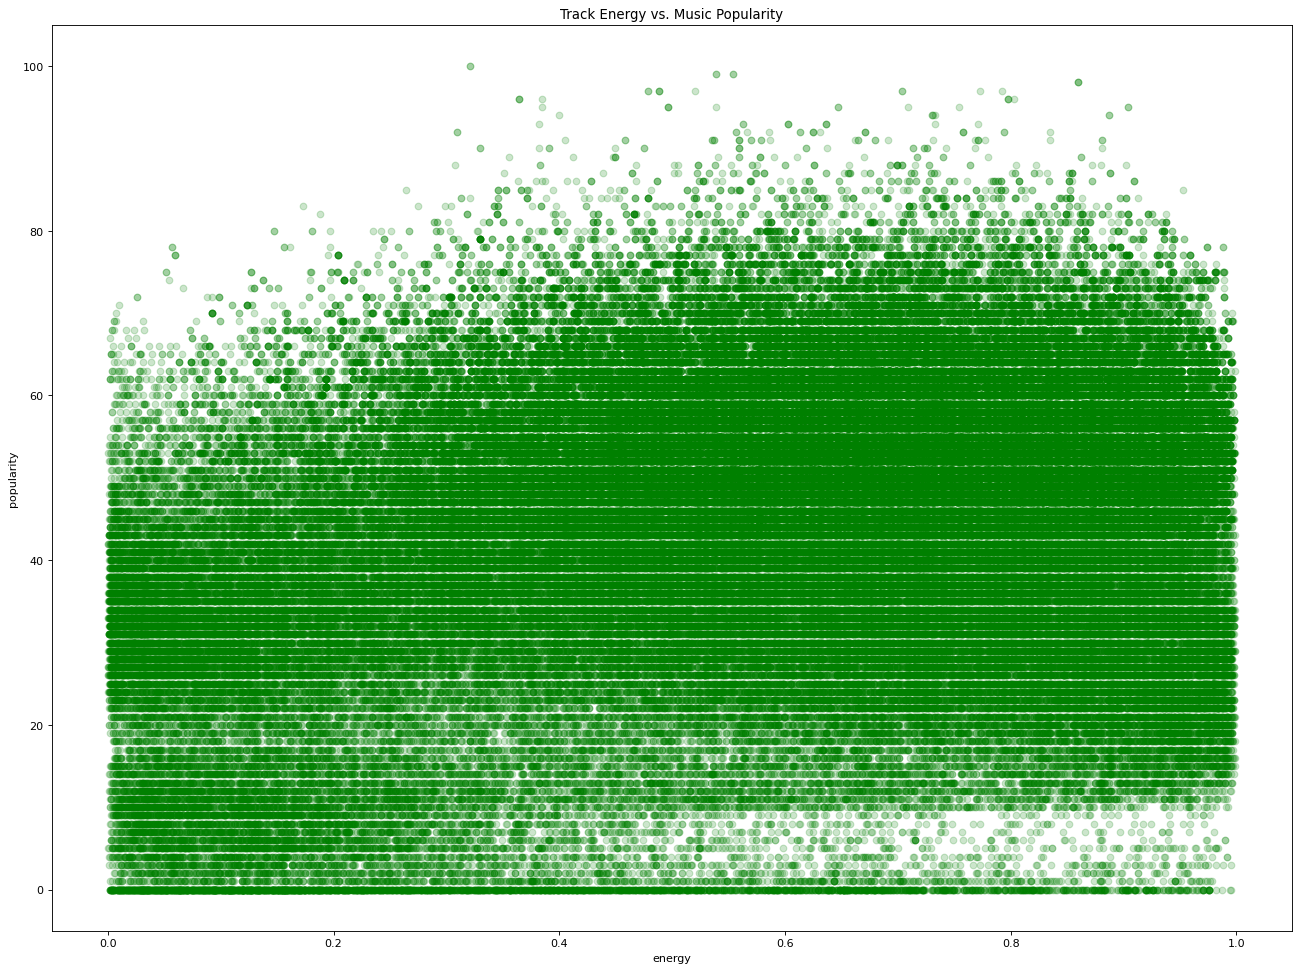

In [31]:
#energy
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['energy'], df['popularity'], alpha=0.2, color = 'green')
plt.xlabel("energy")
plt.ylabel("popularity")
plt.title("Track Energy vs. Music Popularity")
plt.show()

### FEATURES VS. FEATURE PLOT

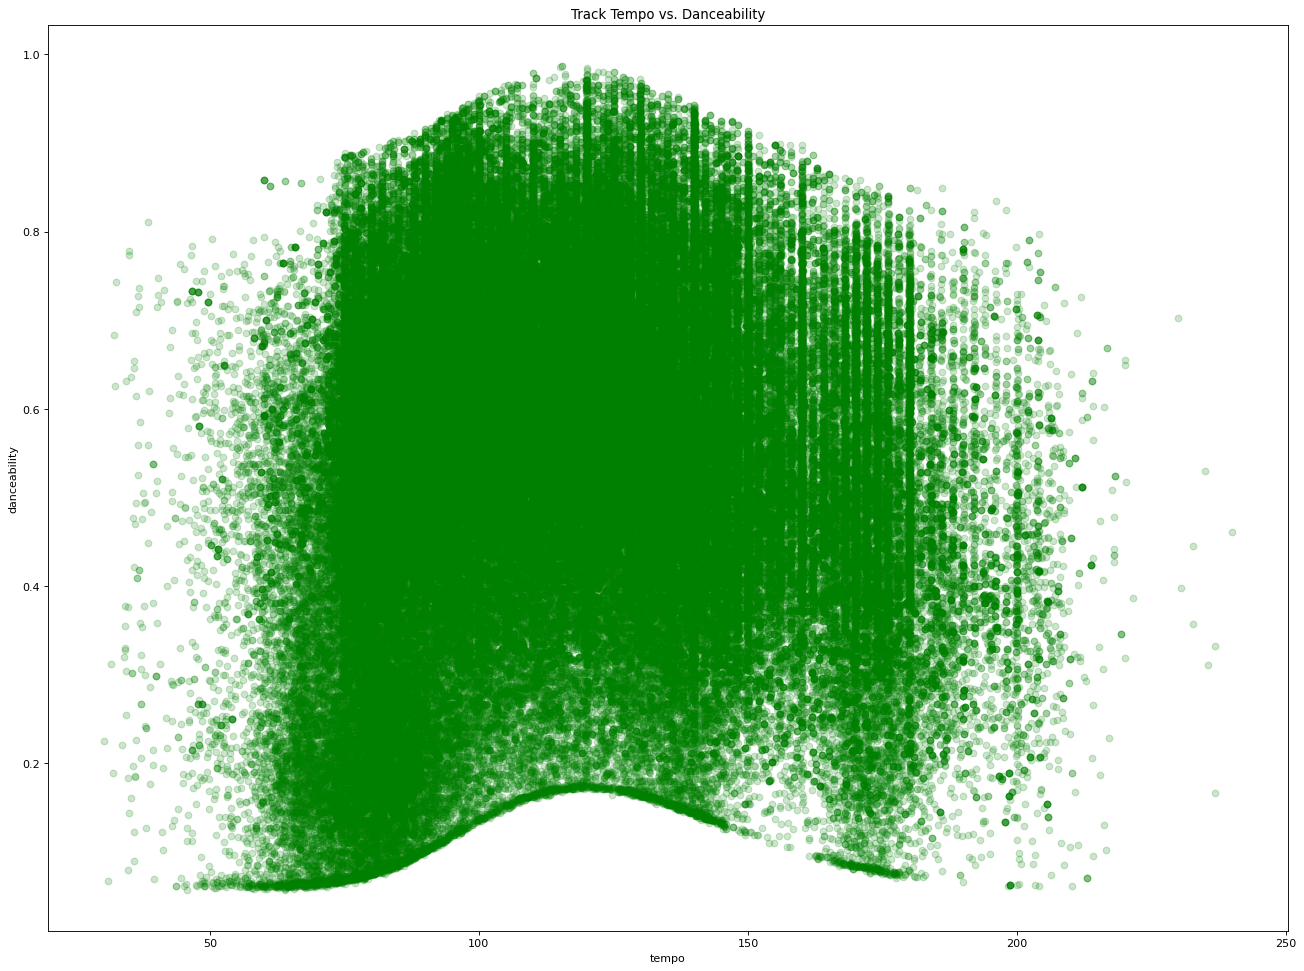

In [32]:
# DANCEABILITY VS. TEMPO
from matplotlib.pyplot import figure 
figure(figsize=(20, 15), dpi=80)
plt.scatter(df['tempo'], df['danceability'], alpha=0.2, color = 'green')
plt.xlabel("tempo")
plt.ylabel("danceability")
plt.title("Track Tempo vs. Danceability")
plt.show()

In [33]:
#please see seaborn plots in plots section in github, error in loading seaborn packages, figures drawn using VScode
# sns.barplot(x = 'mode', y = 'popularity', hue='key', palette=sns.light_palette('seagreen'), data = df)
# plt.title('Popularity Based on Mode and Key')
# plt.show()

DATA ENCODING:
There are 3 categorical variables in the dataset that will be included in splitting/feature matrix. These categories are sound keys, modes, and time signatures (For instance, 2/4 (said as “two four”) means “two quarter notes per measure"). For the key column, we have 12 keys (C#,C,D,D# etc.) as could be seen from the barplot above. For the modes, we have minor and major. 

HISTOGRAM FOR FEATURE VARIABLES

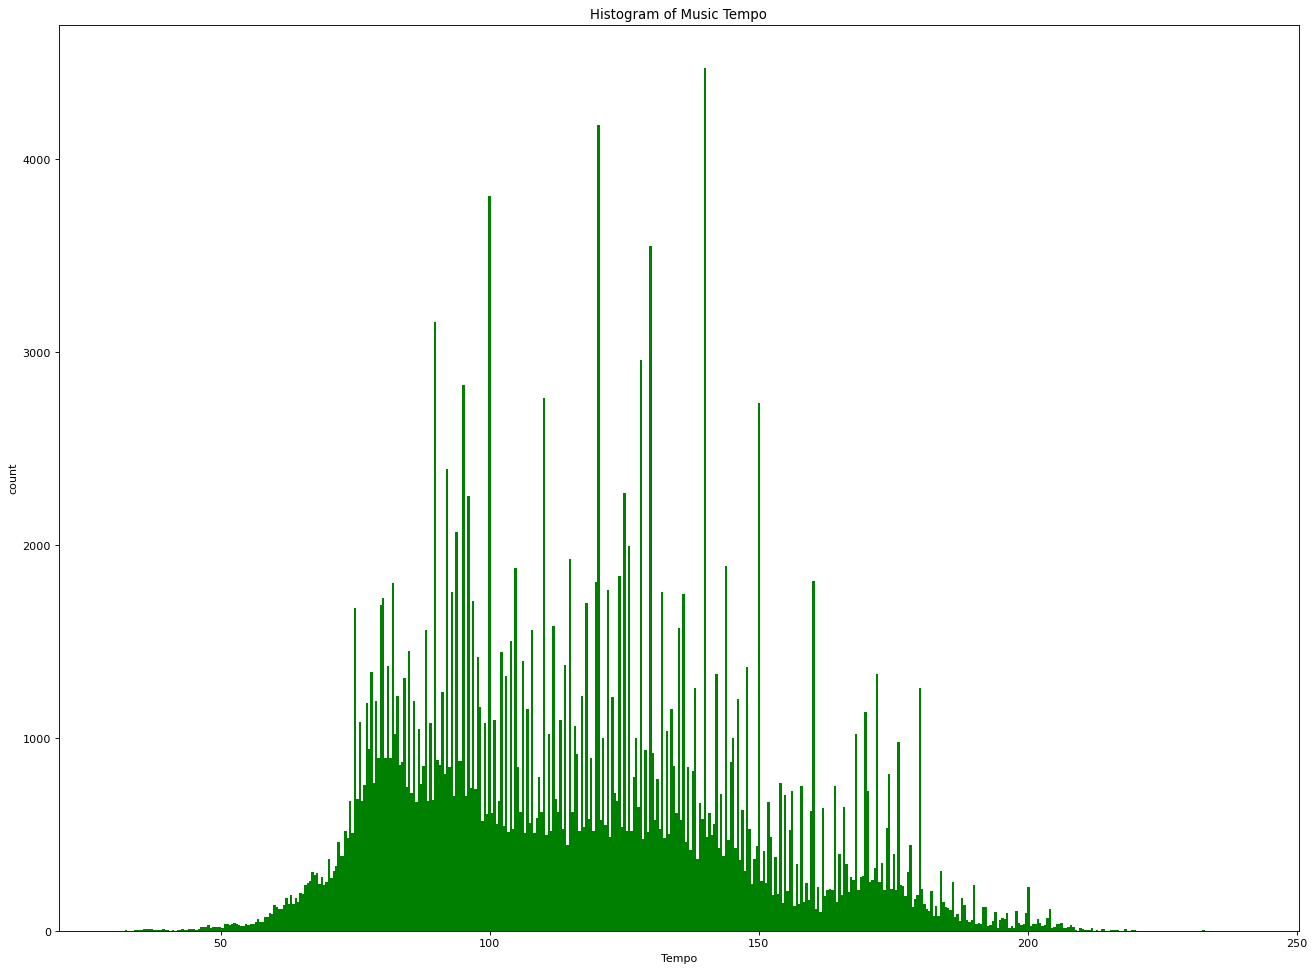

In [34]:
from matplotlib.pyplot import figure 
#VISUALIZATION OF MUSIC TEMPO
figure(figsize=(20, 15), dpi=80)
plt.hist(df["tempo"], color = 'green', bins=int(np.sqrt(df.shape[0])))
plt.xlabel("Tempo")
plt.ylabel("count")
plt.title("Histogram of Music Tempo")
plt.show()

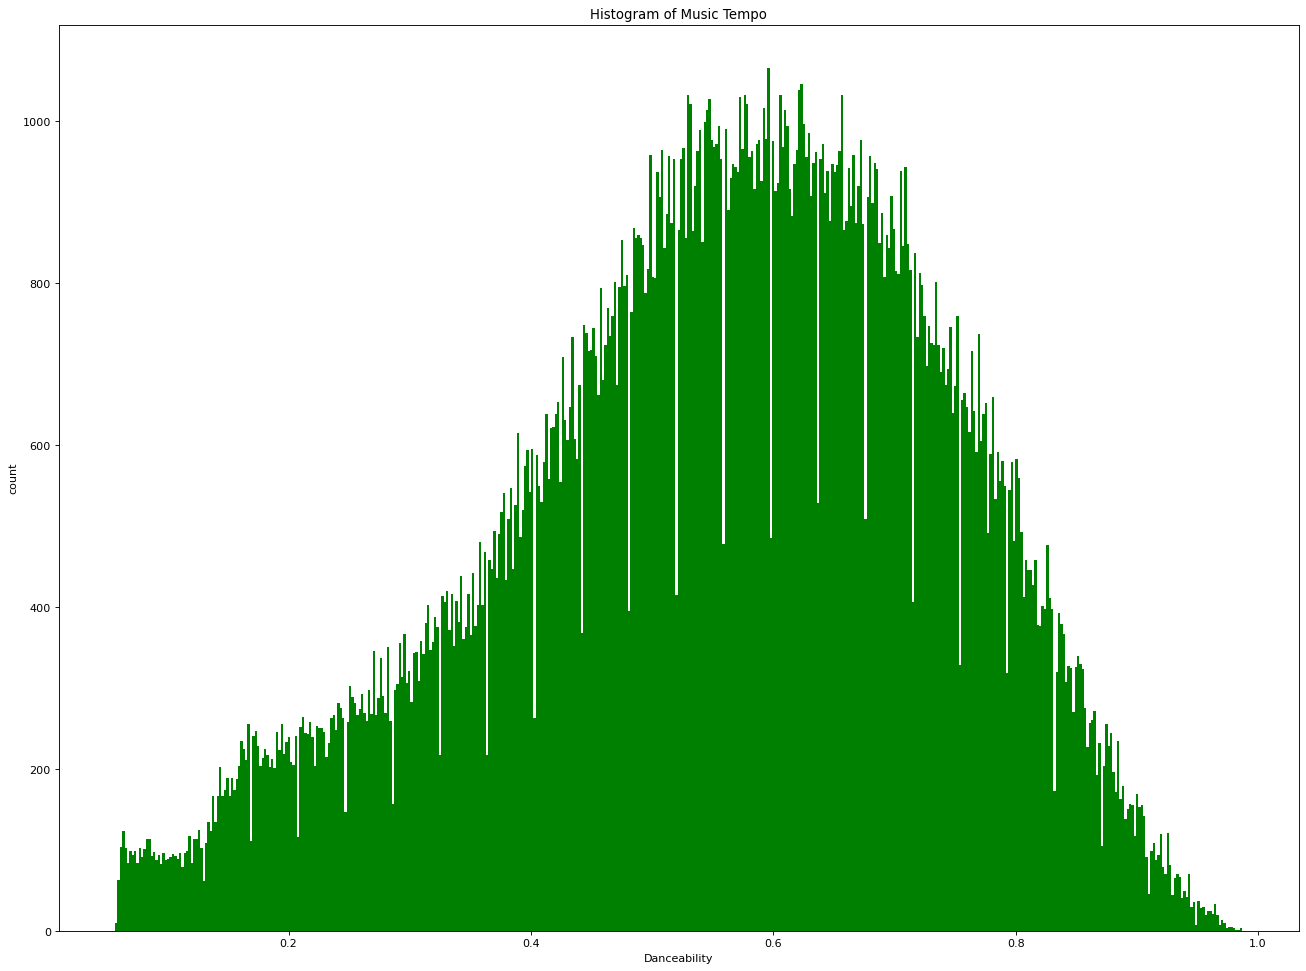

In [35]:
from matplotlib.pyplot import figure 
#VISUALIZATION OF MUSIC TEMPO
figure(figsize=(20, 15), dpi=80)
plt.hist(df["danceability"], color = 'green', bins=int(np.sqrt(df.shape[0])))
plt.xlabel("Danceability")
plt.ylabel("count")
plt.title("Histogram of Music Tempo")
plt.show()

### DATA PREPROCESSING

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocessor():
    
    #setting up target variable
    y = df["popularity"]

    # setting up feature variable:                                     
    X = df[["genre","acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", "mode", "speechiness", "tempo", "time_signature", "valence", "loudness"]]                  
    
    #setting up random_state value
    random_seed = 42
        
    #first, splitting the data into training and other datasets - doing a 60|20|20 splitting
    X_train, X_other, y_train, y_other = train_test_split(X, y, train_size = 0.8, random_state = random_seed)
    print("Training set size: ", X_train.shape)  # 60% of points are in train
    print(X_other.shape, y_other.shape) # 40% of points are in other         

    #second, splitting the "other" data into test and validation sets
    X_val, X_test, y_val, y_test = train_test_split(X_other, y_other, train_size = 0.5, random_state = random_seed)
    print('Validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
    print('Test set:',X_test.shape, y_test.shape) # 20% of points are in test     

    #Using Sklearn's preprocessing pipeline, first deciding whether each column is cat, cont, or ord:
    one_hot_ftrs = ["genre", "mode", "key", "time_signature"] 
    standard_ftrs = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "speechiness", "tempo", "valence", "loudness"] #these are the continous features

    #setting up preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), one_hot_ftrs),
            ('std', StandardScaler(), standard_ftrs)])

    #Calling sklearn's preprocessing pipeline
    clf = Pipeline(steps=[('preprocessor', preprocessor)])

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

#     print("Size training data: " + str(X_train.shape))
    print("Size of preprocessed training data: " + str(X_train_prep.shape))
    print("training data " + str(X_train_prep))
    print("Size of preprocessed testing data: " + str(X_test_prep.shape))
    print("testing data " + str(X_test_prep))
    print("Size of preprocessed validation data: " + str(X_val_prep.shape))
    print("validation data " + str(X_val_prep))

preprocessor()

Training set size:  (182527, 14)
(45632, 14) (45632,)
Validation set: (22816, 14) (22816,)
Test set: (22816, 14) (22816,)
Size of preprocessed training data: (182527, 55)
training data [[ 0.          0.          0.         ...  0.73579603 -0.08325647
   0.33057502]
 [ 0.          0.          0.         ...  0.73905384 -0.91754044
   0.05391091]
 [ 0.          0.          0.         ... -1.22322225 -0.15375934
   0.94041336]
 ...
 [ 0.          0.          0.         ...  0.27866027  0.2418401
   0.31846571]
 [ 0.          0.          0.         ...  0.18278296 -0.38093525
   0.17433128]
 [ 0.          0.          0.         ... -2.03138693 -0.09500694
  -0.25857658]]
Size of preprocessed testing data: (22816, 55)
testing data [[ 0.          0.          0.         ... -1.39464816 -1.52073167
  -2.57969597]
 [ 0.          0.          0.         ... -0.08549762  1.97307727
  -2.15671102]
 [ 0.          0.          0.         ...  1.51545488  1.30329999
   0.63448509]
 ...
 [ 0.          0